In [6]:
%matplotlib inline

import openpifpaf
openpifpaf.show.Canvas.show = True

# Datasets

This section focuses on the COCO keypoint dataset which was the original
dataset that OpenPifPaf started with. In general, 
training datasets are large and require a computer with a good GPU to train and 
evaluate in reasonable times. Additional datasets are availble as plugins 
(for example {doc}`plugins_crowdpose`, {doc}`plugins_wholebody`, 
{doc}`plugins_apollocar3d` and {doc}`plugins_animalpose`).

```{note}
These datasets are not required to do pose predictions on your own images.
Even for training, you are unlikely to need all the datasets for your use case.
```

OpenPifPaf is extendible with plugins and it has been our focus to make 
it particularly easy to extend it with custom datasets that are formatted
in the COCO format. Please see the tutorial on {doc}`custom datasets <plugins_custom>`
for a step-by-step walkthrough.

## Download COCO data

[COCO](http://cocodataset.org/) is a great datasets containing many types of annotations, including bounding boxes, 2D poses, etc.
You can also copy this code block into a code cell in Jupyter or Google Colab with the prefix `%%bash`.

```sh
mkdir data-mscoco
cd data-mscoco

wget -q -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip
wget -q -nc http://images.cocodataset.org/annotations/image_info_test2017.zip
unzip -q -n annotations_trainval2017.zip
unzip -q -n image_info_test2017.zip

mkdir images
cd images
wget -q -nc http://images.cocodataset.org/zips/val2017.zip
wget -q -nc http://images.cocodataset.org/zips/train2017.zip
wget -q -nc http://images.cocodataset.org/zips/test2017.zip
unzip -q -n val2017.zip
unzip -q -n train2017.zip
unzip -q -n test2017.zip
```

## COCO Person Skeletons

COCO / kinematic tree / dense:

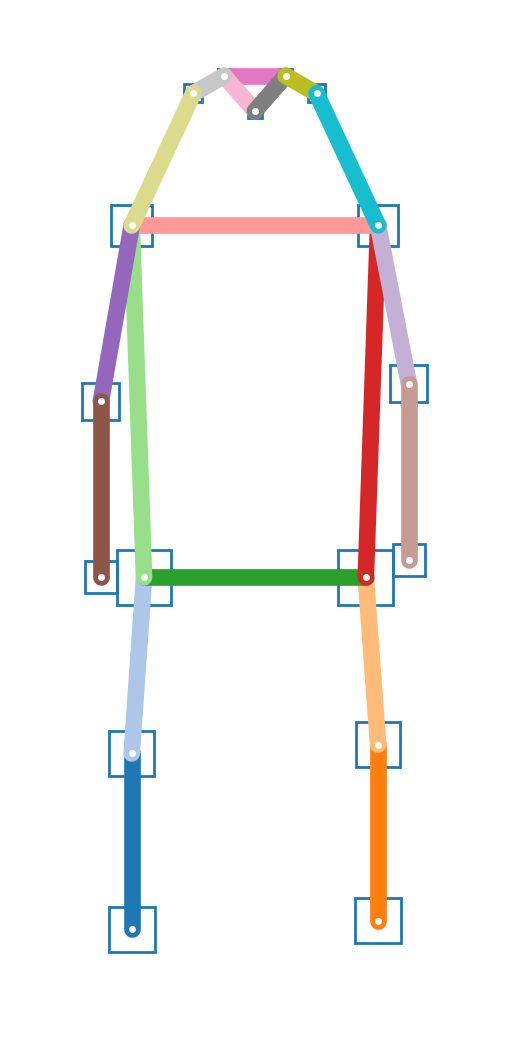

In [8]:
# HIDE CODE

# first make an annotation
ann_coco = openpifpaf.Annotation.from_cif_meta(
    openpifpaf.plugins.coco.CocoKp().head_metas[0])

# visualize the annotation
openpifpaf.show.KeypointPainter.show_joint_scales = True
keypoint_painter = openpifpaf.show.KeypointPainter()
with openpifpaf.show.Canvas.annotation(ann_coco, ncols=1) as (ax1):
    keypoint_painter.annotation(ax1, ann_coco)

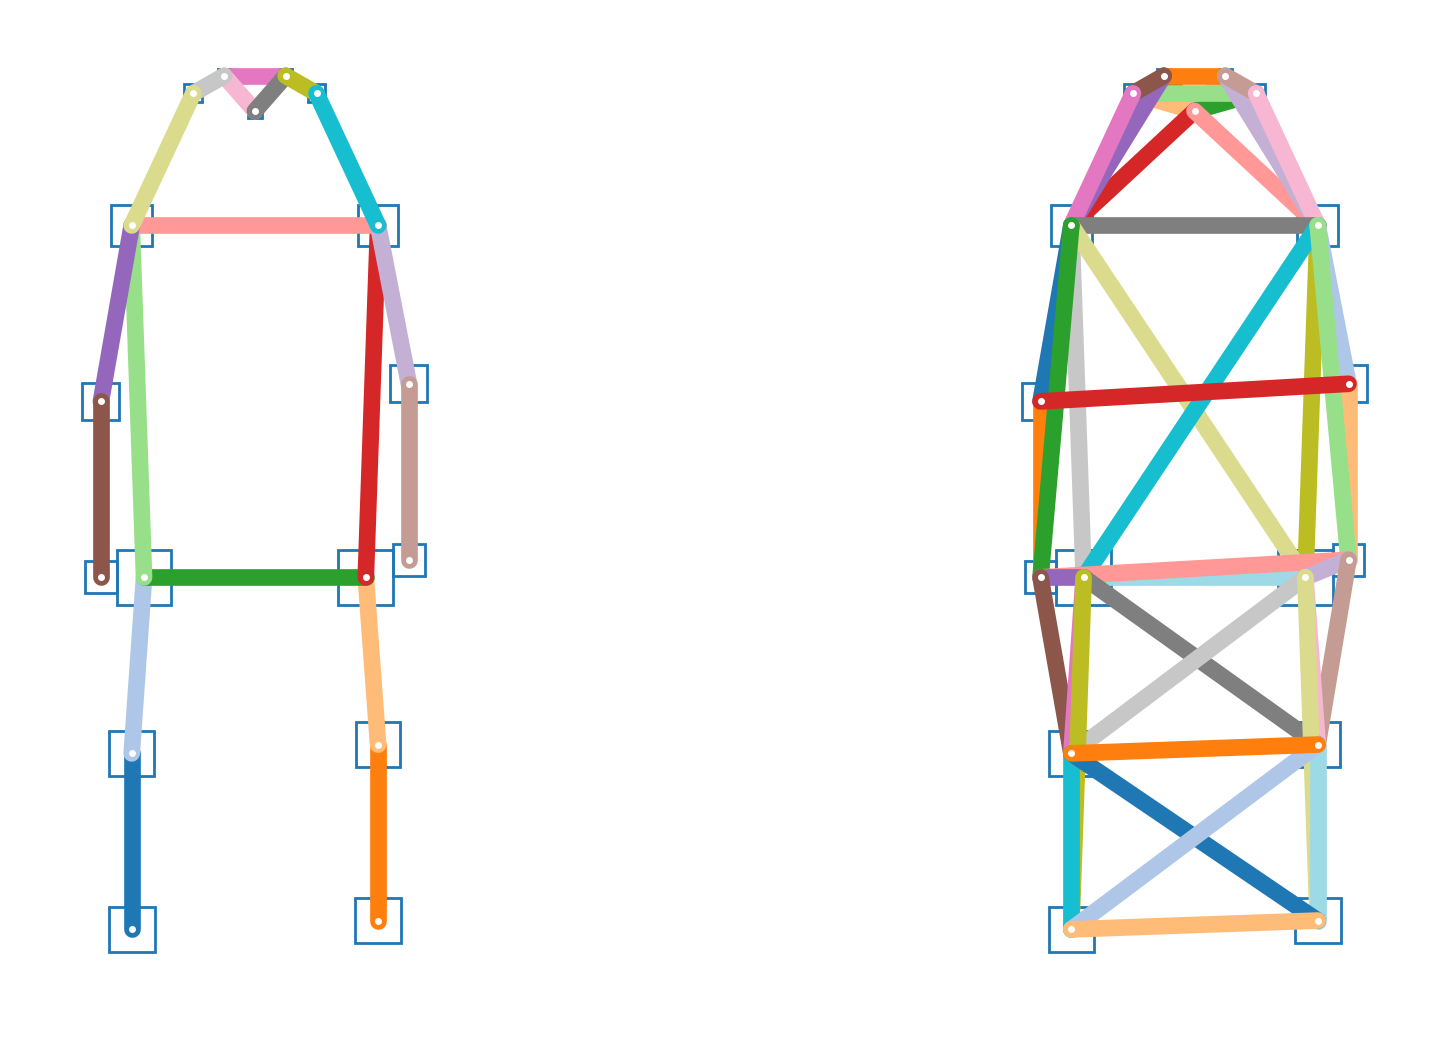

In [6]:
# HIDE CODE

# first make an annotation
ann_coco = openpifpaf.Annotation.from_cif_meta(
    openpifpaf.plugins.coco.CocoKp().head_metas[0])
ann_kin = openpifpaf.Annotation.from_cif_meta(
    openpifpaf.plugins.coco.CocoKp(skeleton=openpifpaf.plugins.coco.constants.KINEMATIC_TREE_SKELETON).head_metas[0])
ann_dense = openpifpaf.Annotation.from_cif_meta(
    openpifpaf.plugins.coco.CocoKp(skeleton=openpifpaf.plugins.coco.constants.DENSER_COCO_PERSON_SKELETON).head_metas[0])

# visualize the annotation
openpifpaf.show.KeypointPainter.show_joint_scales = True
keypoint_painter = openpifpaf.show.KeypointPainter()
with openpifpaf.show.Canvas.annotation(ann_coco, ncols=3) as (ax1, ax2, ax3):
    keypoint_painter.annotation(ax1, ann_coco)
    keypoint_painter.annotation(ax2, ann_kin)
    keypoint_painter.annotation(ax3, ann_dense)

(coco-person-keypoints)=
## COCO Person Keypoints

In [15]:
for i, name in enumerate(openpifpaf.plugins.coco.constants.COCO_KEYPOINTS):
    print(i, name)

0 nose
1 left_eye
2 right_eye
3 left_ear
4 right_ear
5 left_shoulder
6 right_shoulder
7 left_elbow
8 right_elbow
9 left_wrist
10 right_wrist
11 left_hip
12 right_hip
13 left_knee
14 right_knee
15 left_ankle
16 right_ankle


In [5]:
print('associations')
kp_names = openpifpaf.plugins.coco.constants.COCO_KEYPOINTS
for i, (joint1, joint2) in enumerate(openpifpaf.plugins.coco.constants.COCO_PERSON_SKELETON):
    print('{:2d}: {:15s} --> {}'.format(i, kp_names[joint1 - 1], kp_names[joint2 - 1]))

associations
 0: left_ankle      --> left_knee
 1: left_knee       --> left_hip
 2: right_ankle     --> right_knee
 3: right_knee      --> right_hip
 4: left_hip        --> right_hip
 5: left_shoulder   --> left_hip
 6: right_shoulder  --> right_hip
 7: left_shoulder   --> right_shoulder
 8: left_shoulder   --> left_elbow
 9: right_shoulder  --> right_elbow
10: left_elbow      --> left_wrist
11: right_elbow     --> right_wrist
12: left_eye        --> right_eye
13: nose            --> left_eye
14: nose            --> right_eye
15: left_eye        --> left_ear
16: right_eye       --> right_ear
17: left_ear        --> left_shoulder
18: right_ear       --> right_shoulder


## Download MPII data [draft]

This MPII data is currently not used anywhere.

```sh
mkdir data-mpii
cd data-mpii
wget https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1.tar.gz
wget https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1_u12_2.zip
```

## Download NightOwls data [draft]

```sh
mkdir data-nightowls
cd data-nightowls
wget http://www.robots.ox.ac.uk/\~vgg/data/nightowls/python/nightowls_validation.json
wget http://www.robots.ox.ac.uk/\~vgg/data/nightowls/python/nightowls_validation.zip
unzip nightowls_validation.zip
```